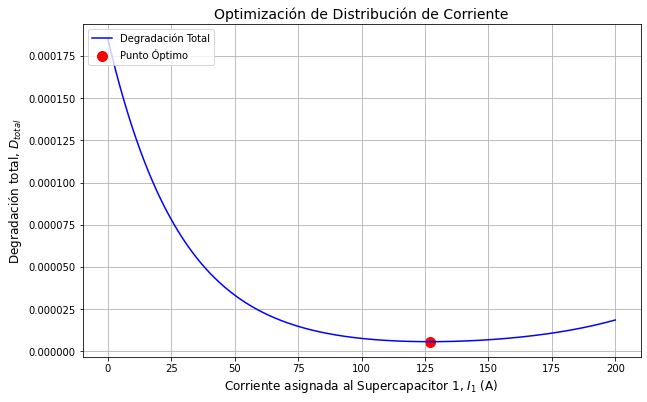

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_svg import FigureCanvasSVG

# Parámetros del modelo
I_RMS1 = 30 / np.log(2)  #  Factor de corriente SC1
I_RMS2 = 20 / np.log(2)  #  Factor de corriente SC2
I_total = 200            #  Corriente total a distribuir (A)
deg_base = 1/1540/3600   #  degradacion base 1/1540[horas]/3600[sec/horas]
num_points = 1000        #  Resolución de la búsqueda

# Función de degradación total
def degradation(I1):
    return deg_base*(np.exp(I1 / I_RMS1) + np.exp((I_total - I1) / I_RMS2))

# Generar valores de I1
I1_values = np.linspace(0, I_total, num_points)
D_total = np.array([degradation(I1) for I1 in I1_values])

# Encontrar el mínimo
D_min = np.min(D_total)
idx = np.argmin(D_total)
I1_opt = I1_values[idx]

# Configuración del gráfico
fig = plt.figure(figsize=(10, 6))
plt.plot(I1_values, D_total, 'b-', linewidth=1.5)
plt.scatter(I1_opt, D_min, s=100, c='r', marker='o')

plt.xlabel('Corriente asignada al Supercapacitor 1, $I_1$ (A)', fontsize=12)
plt.ylabel('Degradación total, $D_{total}$', fontsize=12)
plt.title('Optimización de Distribución de Corriente', fontsize=14)
plt.grid(True)
plt.legend(['Degradación Total', 'Punto Óptimo'], loc='upper left', fontsize=10)

# Exportar a SVG
canvas = FigureCanvasSVG(fig)
canvas.print_svg("15-MPC-Optimization.svg")

plt.show()


In [2]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Guardar en pdf la figura
with PdfPages('15-MPC-Optimization.pdf') as pdf:
    pdf.savefig(fig)
